<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Week%208%20-%20CNN%20ANN/Car_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset : https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Week%208%20-%20CNN%20ANN/car_purchasing.csv

# Notes
- AI is the simulation of human intelligence processes by reaction,expecially computer systems
- ML is the study that uses statistical methods to enable machines to improve with experience
- DL is a subset of ML, which is a subset of AI DL uses Neural Networks(Similar to neurons of brain) to imitate functionalities just like a human brain
- DL+Linguistics+NLP+CS = ChatGPT
- 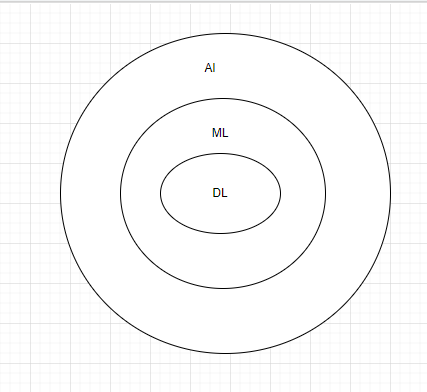

# Neuron Comparison
- Dendrite =Input
- Soma = cell body (Calculation)
- Axon = Receives  Results
- Axon Terminals = Info will be received by another neuron .For the 1st neuron It will be Output but for 2nd one it will be input. Like this way a network is  created from lots of neuron.


# ANN (Artificial Neural Network)
- 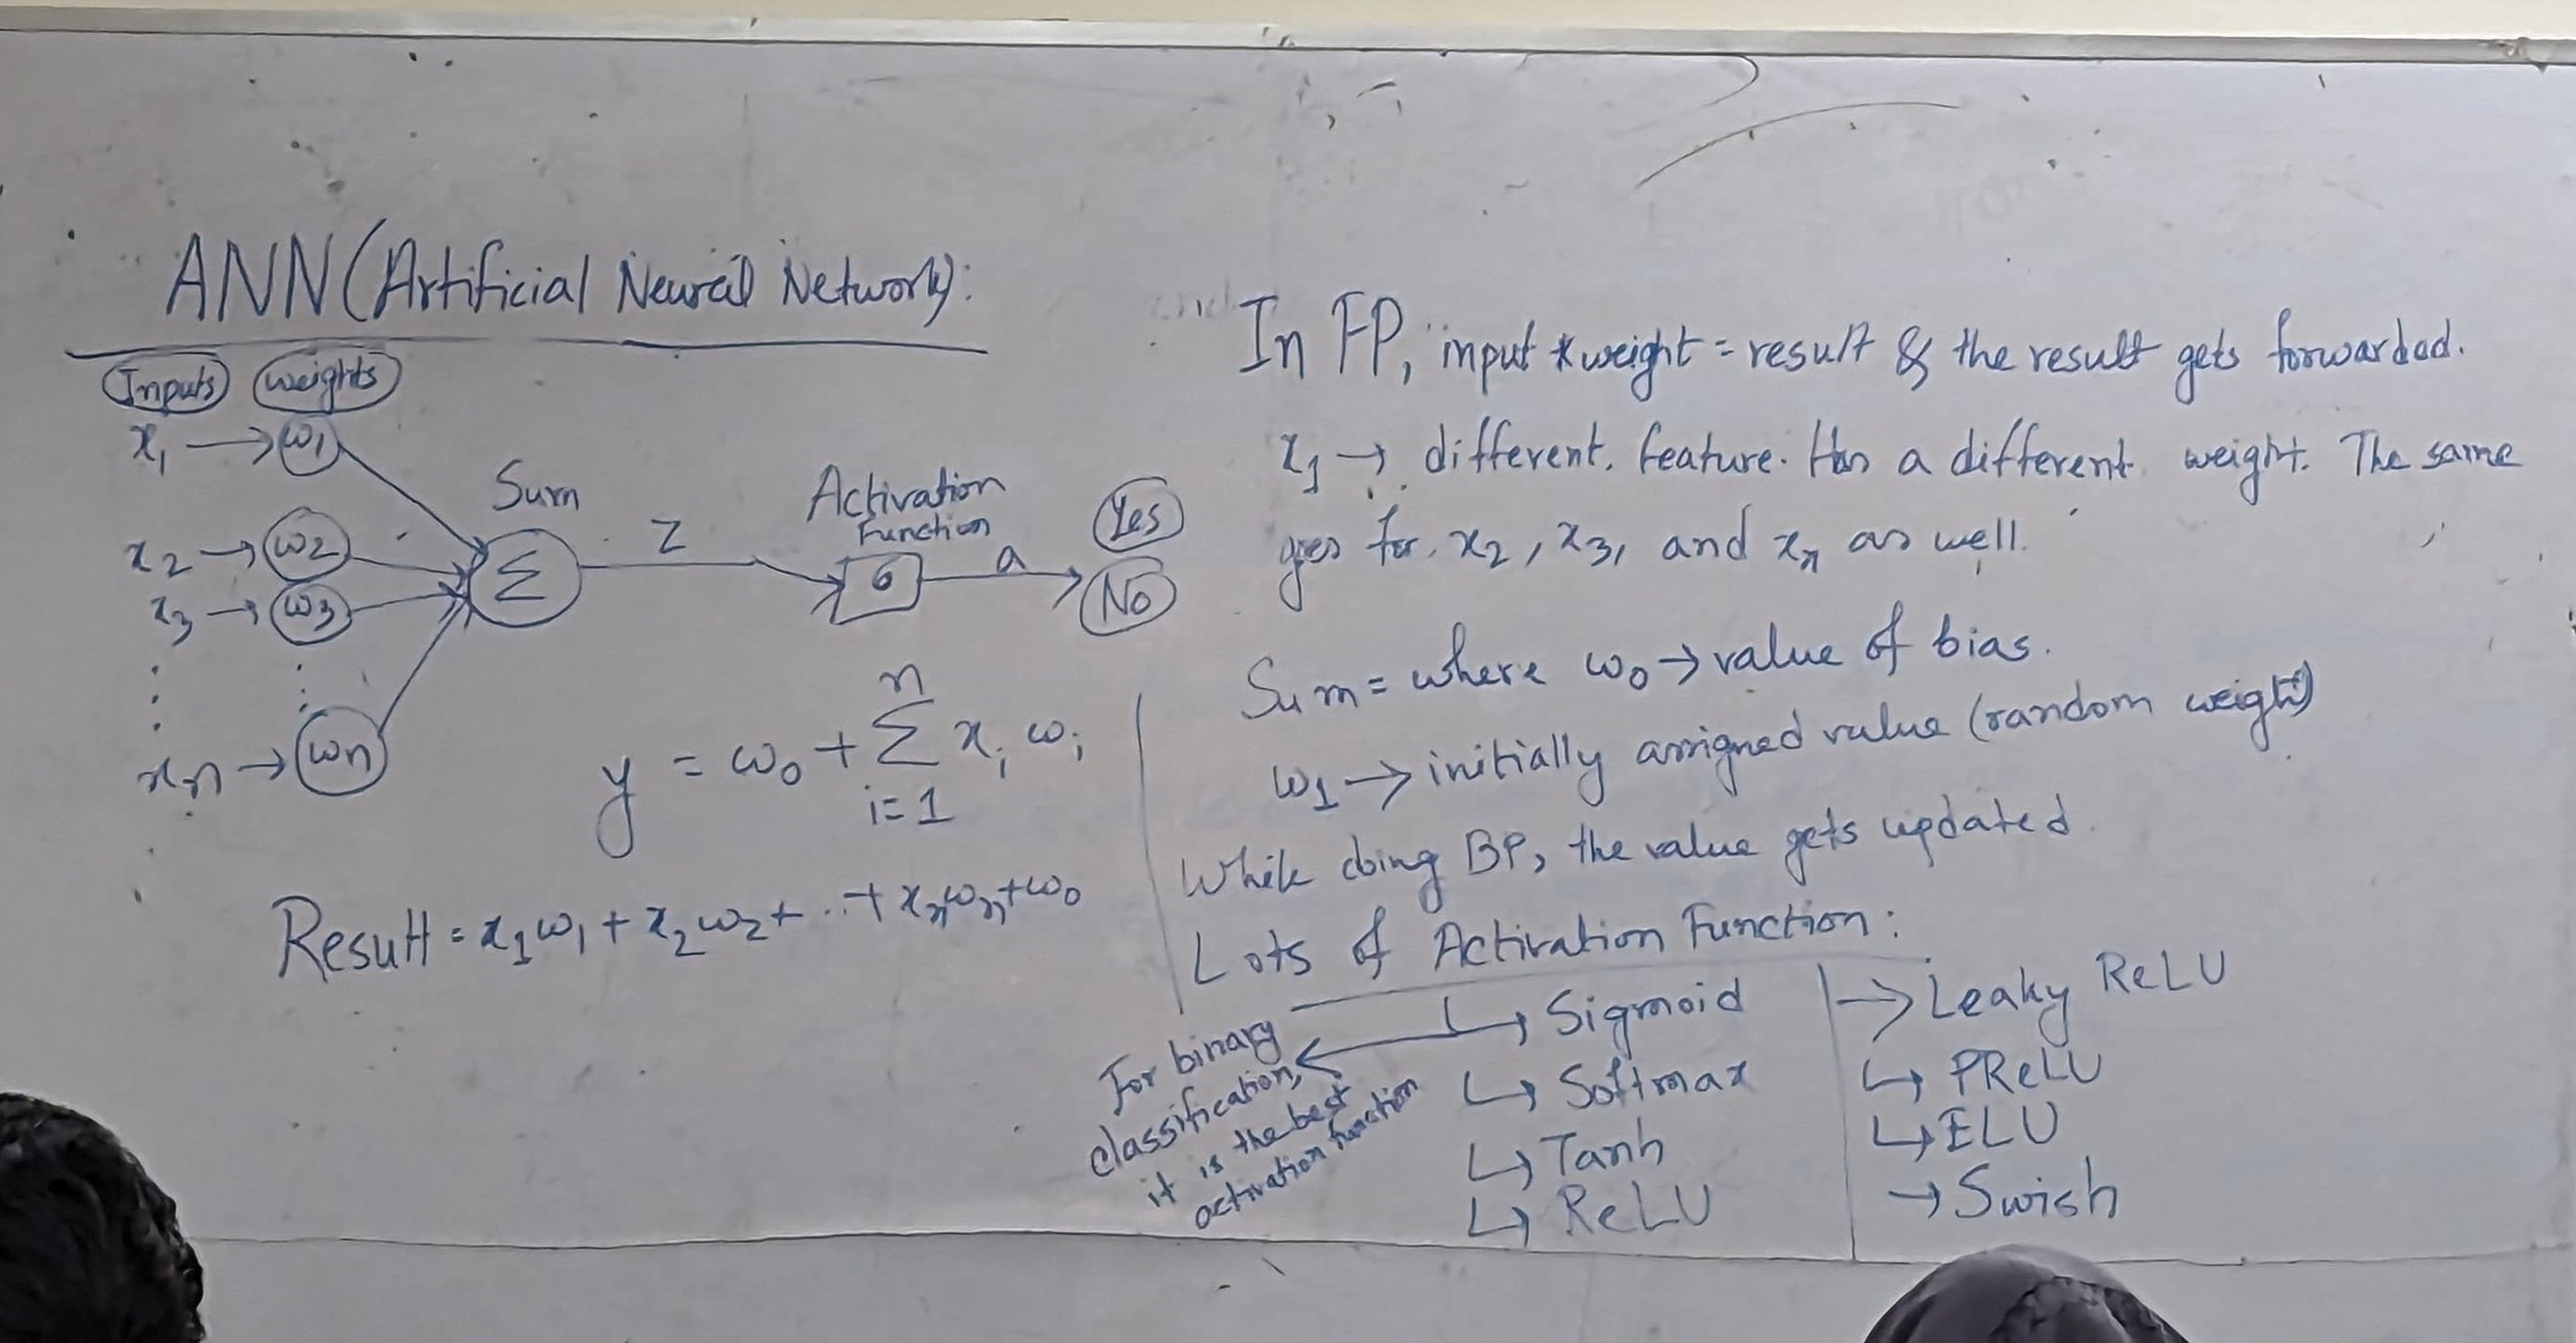

- 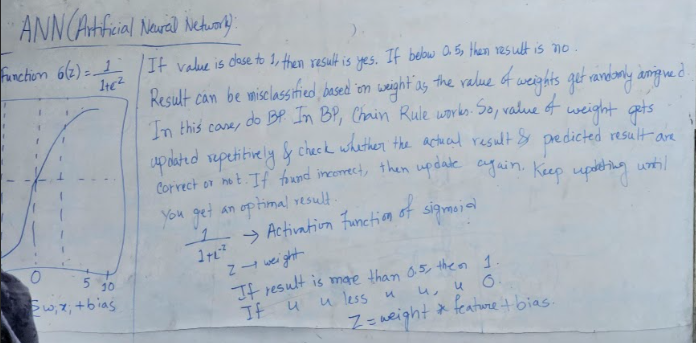
